In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Simple LUME-Astra example

In [2]:
from astra import Astra,  template_dir

import matplotlib.pyplot as plt
import os

In [3]:
# Input template file 
MY_TEMPLATE = os.path.join(template_dir, 'dcgun/astra.in')

In [4]:
# Make an Astra object
A = Astra(input_file=MY_TEMPLATE)

In [5]:
# Change some inputs
A.input['newrun']['zemit']  = 1000
A.input['newrun']['zphase'] = 20
A.input['newrun']['phases'] = True
A.input['newrun']['zstop']  = 1

# Special flag
A.verbose = True

In [6]:
# Run
A.run()

init dir:  /Users/chrisonian/Code/GitHub/lume-astra/examples
running astra in /private/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp2i88yoz1
 --------------------------------------------------------------------------

               Astra- A space charge tracking algorithm 
                            Version 3.0              
                        DESY,  Hamburg 2011          
                        Tue Feb  4 18:38:47 

     Parameter file is:  astra.in                                          
     astra input file for L0 injector (20070501_1)                                   

 Initialize element settings:
     neglecting space charge forces 

 --------------------------------------------------------------------------
 Cavity:

     Reading cavity field data from:      /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/dcgun_GHV.dat          
     maximum gradient                     -11.60     MV/m
     at                                   3.9750E-02 m
     estimat

In [7]:
# Output is automatically parsed into a .output dict
A.output.keys()

dict_keys(['stats', 'particles', 'run_info', 'other'])

In [8]:
# These are the statistics from Astra's Xemit style files
A.output['stats'].keys()

dict_keys(['mean_z', 'mean_t', 'mean_x', 'sigma_x', 'sigma_xp', 'norm_emit_x', 'cov_x__xp', 'mean_y', 'sigma_y', 'sigma_yp', 'norm_emit_y', 'cov_y__yp', 'mean_kinetic_energy', 'sigma_z', 'sigma_energy', 'norm_emit_z', 'cov_z__energy'])

In [9]:
# Some simple run info
A.output['run_info']

{'start_time': 1580870327.7387068,
 'run_script': '/Users/chrisonian/Code/astra/bin/Astra astra.in',
 'run_time': 2.285684108734131,
 'run_error': False}

In [10]:
# Other data, such as from the LandF file, are stored here
A.output['other']

{'landf_z': array([0.      , 0.049975, 0.1     , 0.15    , 0.2     , 0.25    ,
        0.3     , 0.35    , 0.4     , 0.45    , 0.5     , 0.55    ,
        0.6     , 0.65    , 0.7     , 0.75    , 0.8     , 0.85    ,
        0.9     , 0.95    , 1.      ]),
 'landf_n_particles': array([2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000.]),
 'landf_total_charge': array([-0.e+00,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,
         1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,
         1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10]),
 'landf_n_lost': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 'landf_energy_deposited': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 'landf_energy_exchange': array([ 0.0000e+00,  4.4743e-05,  5.2223e-

In [11]:
# This is the path that work was done. By default, this will be automatically cleaned up.
A.path

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp2i88yoz1'

# Particles 

In [12]:
# Particles are automatically parsed in to openpmd-beamphysics ParticleGroup objects
A.output['particles']

In [13]:
# Get the last item, and request some statistic
P = A.output['particles'][-1]
P['mean_energy']

1010791.4957999793

In [14]:
# Show the units
P.units('mean_energy')

pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0))

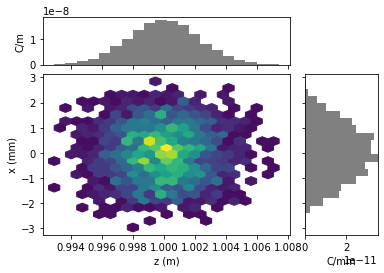

In [15]:
# This provides easy ploting

from pmd_beamphysics.plot import marginal_plot

marginal_plot(P, 'z', 'x', bins=20)

[]

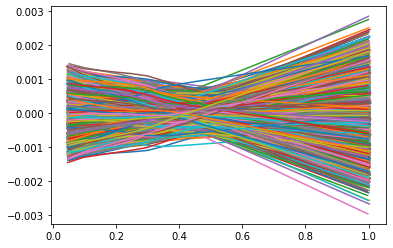

In [16]:
# Traces can be made by gathering the coordinate arrays
plt.plot(
    [P.z for P in  A.particles],
    [P.x for P in  A.particles]
)
plt.plot()

# Stats

Astra computes statistics in several output tables


In [17]:
# Astra's own calculated statistics can be retieved
len(A.stat['norm_emit_x']), A.stat['norm_emit_x'][-1]

(999, 7.68e-07)

In [18]:
# Stats can also be computed from the particles. For example:
[P['norm_emit_x'] for P in A.particles]

[1.120607066955455e-06,
 7.708840309648321e-07,
 7.764307135349936e-07,
 8.089763085960301e-07,
 1.0018156926639979e-06,
 1.2100784017802043e-06,
 8.628526530237935e-07,
 7.737878560948767e-07,
 7.691539667661085e-07,
 7.688302360500789e-07,
 7.687792505165113e-07,
 7.687708066578121e-07,
 7.687736123864184e-07,
 7.687736226118561e-07,
 7.68773632837843e-07,
 7.687736430644644e-07,
 7.687736532916504e-07,
 7.687736635194125e-07,
 7.68773673747739e-07,
 7.687736839766916e-07]

In [19]:
# For convenience, this function returns the same thing as a numpy array
A.particle_stat('norm_emit_x')

array([1.12060707e-06, 7.70884031e-07, 7.76430714e-07, 8.08976309e-07,
       1.00181569e-06, 1.21007840e-06, 8.62852653e-07, 7.73787856e-07,
       7.69153967e-07, 7.68830236e-07, 7.68779251e-07, 7.68770807e-07,
       7.68773612e-07, 7.68773623e-07, 7.68773633e-07, 7.68773643e-07,
       7.68773653e-07, 7.68773664e-07, 7.68773674e-07, 7.68773684e-07])

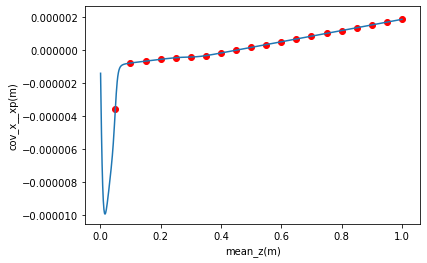

In [20]:
# Compare these. 
key1 = 'mean_z'
key2 = 'cov_x__xp'
units1 = str(A.units(key1))
units2 = str(A.units(key2))
plt.xlabel(key1+f'({units1})')
plt.ylabel(key2+f'({units2})')
plt.plot(A.stat[key1], A.stat[key2])
plt.scatter(A.particle_stat(key1), A.particle_stat(key2), color='red')

# Alternative ways to run: run_astra, evaluate_astra

This is the functional way to run astra and return the evaluate Astra object, or simple dict of outputs

Settings is a list of settings that can appear in the input file.

In [21]:
from astra import run_astra, run_astra_with_generator

In [22]:
settings0 = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}

# Just run astra
A2 = run_astra(settings0, astra_input_file=MY_TEMPLATE, verbose=True, timeout=100)

run_astra
zstop is in astra newrun
zemit is in astra newrun
zphase is in astra newrun
phases is in astra newrun
init dir:  /Users/chrisonian/Code/GitHub/lume-astra/examples
running astra in /private/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpoimu0h0b
loading 1 particle files
[100.0]


In [23]:
MY_GENERATOR_TEMPLATE = os.path.join(template_dir, 'dcgun/generator.in')

# Run Astra with Generator
settings0['ipart']= 1234

A3 = run_astra_with_generator(settings0, astra_input_file=MY_TEMPLATE,
                              generator_input_file=MY_GENERATOR_TEMPLATE, verbose=True)

run_astra_with_generator
zstop is in astra newrun
zemit is in astra newrun
zphase is in astra newrun
phases is in astra newrun
ipart is in generator
set spacecharge mesh for n_particles: 1234 to {'nrad': 9, 'nlong_in': 17}
 --------------------------------------------------------------------------

                              generator              
                             Version 1.0             
                        DESY,  Hamburg 2002          
                        Tue Feb  4 18:38:54 

     Working File is:    temp_generator.in                                 
     Initializing       1234      electrons
     including 6 probe particles at standard positions
     Particles start from a cathode
     Particles are quasi randomly distributed

          Energy spread too high.
                  28 times standard correction procedure



     Final check:
     Particles taken into account      N =       1234
     total charge                      Q =    -0.1000     nC
     ho

In [24]:
# An even simpler run, returns a simple dict of outputs. For use in optimization
from astra import evaluate_astra_with_generator

MY_GENERATOR_TEMPLATE = os.path.join(template_dir, 'dcgun/generator.in')

# Run Astra with Generator
settings0['ipart']= 1234

outputs = evaluate_astra_with_generator(settings0, astra_input_file=MY_TEMPLATE,
                              generator_input_file=MY_GENERATOR_TEMPLATE, verbose=False)
outputs 

{'error': False,
 'end_mean_z': 1.0,
 'end_mean_t': 4.0156e-09,
 'end_mean_x': -2.7444999999999997e-07,
 'end_sigma_x': 0.0010379,
 'end_sigma_xp': 0.0018407,
 'end_norm_emit_x': 7.6483e-07,
 'end_cov_x__xp': 1.8572182600000004e-06,
 'end_mean_y': 1.1927e-07,
 'end_sigma_y': 0.0010458000000000002,
 'end_sigma_yp': 0.0018501000000000001,
 'end_norm_emit_y': 7.695499999999999e-07,
 'end_cov_y__yp': 1.8814987800000001e-06,
 'end_mean_kinetic_energy': 499790.0,
 'end_sigma_z': 0.0022513999999999998,
 'end_sigma_energy': 1.5443,
 'end_norm_emit_z': 0.0034767,
 'end_cov_z__energy': 2.3995421199999998e-05,
 'end_higher_order_energy_spread': 2.532839682622593,
 'end_n_particle_loss': 0,
 'fingerprint': '26f9e88b0679cd8096ad29a6be3582a6'}

In [25]:
?evaluate_astra_with_generator

Signature:
evaluate_astra_with_generator(
    settings,
    archive_path=None,
    merit_f=None,
    **params,
)
Docstring: Convenience wrapper. See evaluate. 
File:      ~/Code/GitHub/lume-astra/astra/evaluate.py
Type:      function


# Load previously computed run

If Astra was executed manually, and the output files exist along side the input, the Astra object can load them

In [26]:
A4 = Astra(input_file=A.input_file, use_tempdir = False )
A4.load_output()
A4.output.keys()
A4.path

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp2i88yoz1'

# Archive all output

All of .input and .output can be archived and loaded from standard h5 files.

Particles are stored in the openPMD-beamphysics format.

In [27]:
H5FILE='astra.h5'

In [28]:
A.archive(H5FILE)

Archiving to file astra.h5


'astra.h5'

In [29]:
# If no file is given, a filename will be invented based on the fingerprint
H5FILE2 = A2.archive()

Archiving to file astra_c8314f65841b0f465a541bb4a7963390.h5


In [30]:
#These can be loaded into completely empty objects

A5 = Astra()
A5.load_archive(H5FILE2)

In [31]:
# Spot check that the loaded data is the same as the original
A5.stat['sigma_z'][-1] == A.stat['sigma_z'][-1]

True

In [32]:
# Re-configure to set up working dir and run again
A5.configure()
A5.run()

# Check stat again
A5.stat['sigma_z'][-1] == A.stat['sigma_z'][-1]

True

# Reading archived files manually

In [33]:
from h5py import File

In [34]:
# Let's open one of these files
h5 = File(H5FILE, 'r')

# Basic input and output groups are at the top level
list(h5)

['input', 'output']

In [35]:
# Input corresponds to the Asta namelist inputs
list(h5['input'])

['aperture',
 'cavity',
 'charge',
 'fem',
 'newrun',
 'output',
 'quadrupole',
 'scan',
 'solenoid']

In [36]:
# The actual values are in attrs. Retrieve them by casting to a dict
dict(h5['input']['newrun'].attrs)

{'auto_phase': True,
 'cathodes': False,
 'distribution': '/Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/generator.part',
 'emits': True,
 'h_max': 0.002,
 'h_min': 0.0002,
 'head': "'astra input file for L0 injector (20070501_1)'",
 'landfs': True,
 'larmors': False,
 'lmagnetized': True,
 'loop': False,
 'lproject_emit': False,
 'phase_scan': False,
 'phases': True,
 'refs': False,
 'run': 1,
 'screen': array([1.1, 2.2]),
 't_phases': False,
 'tchecks': False,
 'track_all': True,
 'tracks': False,
 'trms': 0.0087,
 'xyrms': 1.1,
 'zemit': 1000,
 'zphase': 20,
 'zstart': 0,
 'zstop': 1}

In [37]:
# Output containts datasets
list(h5['output'])

['other', 'particles', 'stats']

In [38]:
# Example dataset
h5['output']['stats']['norm_emit_x']

<HDF5 dataset "norm_emit_x": shape (999,), type "<f8">

In [39]:
# unit information is stored in the attributes
dict(h5['output']['stats']['norm_emit_x'].attrs)

{'unitDimension': array([1, 0, 0, 0, 0, 0, 0]), 'unitSI': 1, 'unitSymbol': 'm'}

In [40]:
# These can be read in with the units using a helper function

from pmd_beamphysics.units import read_dataset_and_unit_h5

dat, unit = read_dataset_and_unit_h5(h5['output']['stats']['norm_emit_x'])
unit

pmd_unit('m', 1, (1, 0, 0, 0, 0, 0, 0))

In [41]:
# Particles are stored in the openPMD-beamphysics standard.
list(h5['output']['particles']['0'])

['momentum', 'particleStatus', 'position', 'time', 'weight']

In [42]:
# These can be read in as a ParticleGroup object. This is the same type of object that A.particles is kept as.
from pmd_beamphysics import ParticleGroup
P = ParticleGroup(h5['output']['particles']['0'])
P['norm_emit_x']

1.120607066955455e-06

In [43]:
# Cleanup
os.remove(H5FILE)
os.remove(H5FILE2)